In [1]:
import numpy as np
import matplotlib.pyplot as plt

#**4.1. Simulating martingales**

In [2]:
def b_sqr_compensated(interval, step):
  n = int(interval / step)
  B = [0]
  P = [0]
  for i in range(n):
    t = (i+1) * step
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
    P.append(B[-1]**2 - t)
  return P

In [5]:
P = []
for i in range(10):
  P.append(b_sqr_compensated(1, 0.01))

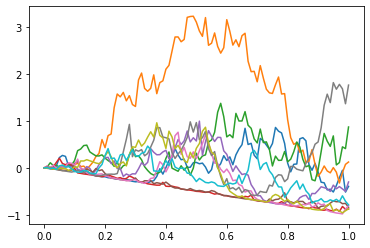

In [6]:
x = np.linspace(0.0, 1.0, 101)
for i in range(10):
  plt.plot(x, P[i])

In [7]:
def geo_brownian(interval, step):
  n = int(interval / step)
  B = [0]
  P = [1]
  for i in range(n):
    t = (i+1) * step
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
    P.append(np.exp(B[-1] - t/2))
  return P

In [8]:
P = []
for i in range(10):
  P.append(geo_brownian(1, 0.01))

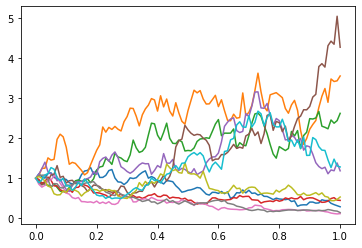

In [9]:
x = np.linspace(0.0, 1.0, 101)
for i in range(10):
  plt.plot(x, P[i])

In [10]:
def comp_poisson(interval, step):
  n = int(interval / step)
  N = [0]
  P = [0]
  for i in range(n):
    t = (i+1) * step
    N.append(np.random.poisson(1 * step) + N[-1])
    P.append(N[-1] - t)
  return P

In [11]:
P = []
for i in range(10):
  P.append(comp_poisson(10, 0.1))

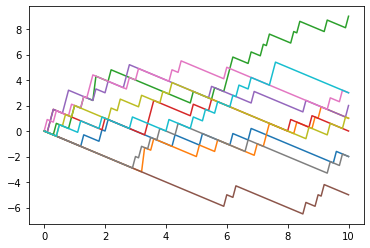

In [12]:
x = np.linspace(0.0, 10.0, 101)
for i in range(10):
  plt.plot(x, P[i])

#**4.2. Maximum of Brownian motion**



In [13]:
def brownian(interval, step):
  n = int(interval / step)
  B = [0]
  for i in range(n):
    B.append(np.sqrt(step) * np.random.standard_normal() + B[-1])
  return B

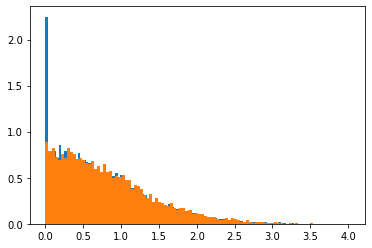

In [14]:
Bmax = []
B1 = []
for i in range(10000):
  B = brownian(1, 0.01)
  Bmax.append(np.max(B))
  B1.append(np.abs(B[-1]))
n, bins, patches = plt.hist(Bmax, 100, density=True)
n, bins, patches = plt.hist(B1, 100, density=True)

#**4.3. First passage time**

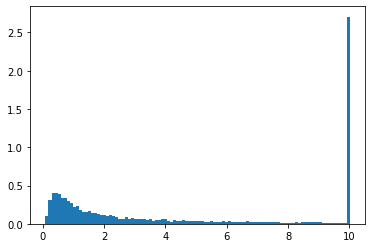

In [15]:
Tau = []
for i in range(10000):
  B = np.array(brownian(10, 0.01))
  X = (B>=1) + 0
  X = list(X)
  if 1 in X :
    Tau.append((list(X).index(1) + 1) * 0.01)
  else:
    Tau.append(10)
n, bins, patches = plt.hist(Tau, 100, density=True)

In [16]:
Exp = np.sum(Tau) / 10000
Exp

4.3742529999999995

In [17]:
T = (np.array(Tau)==10) + 0
np.sum(T/10000)

0.26720000000000005

#**4.3. Gambler's ruin at the French roulette**

In [24]:
def random_walk(X0):
  S = [X0]
  for i in range(5000):
    X = np.random.choice([-1,1], p=[20/38, 18/38])
    S.append(S[-1] + X)
  return S

In [33]:
S200 = 0
for i in range(100):
  S = random_walk(180)
  if 200 in S and 0 in S:
    if S.index(0) > S.index(200) :
      S200 += 1
  elif 200 in S:
    S200 += 1
print(S200 / 100)

0.07


In [39]:
P = []
for X0 in range(1, 200):
  S200 = 0
  for i in range(100):
    S = random_walk(X0)
    if 200 in S and 0 in S:
      if S.index(0) > S.index(200) :
        S200 += 1
    elif 200 in S:
      S200 += 1
  print(S200/100)
  P.append((S200/100))
P

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.0
0.01
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.01
0.01
0.02
0.03
0.0
0.0
0.01
0.0
0.01
0.03
0.01
0.01
0.0
0.01
0.0
0.02
0.02
0.04
0.02
0.0
0.06
0.05
0.04
0.06
0.03
0.05
0.03
0.04
0.04
0.09
0.07
0.12
0.08
0.08
0.05
0.16
0.23
0.26
0.13
0.23
0.24
0.26
0.31
0.33
0.36
0.38
0.48
0.48
0.5
0.56
0.66
0.73
0.83
0.89


[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.0,
 0.01,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01,
 0.01,
 0.02,
 0.03,
 0.0,
 0.0,
 0.01,
 0.0,
 0.01,
 0.03,
 0.01,
 0.01,
 0.0,
 0.01,
 0.0,
 0.02,
 0.02,
 0.04,
 0.02,


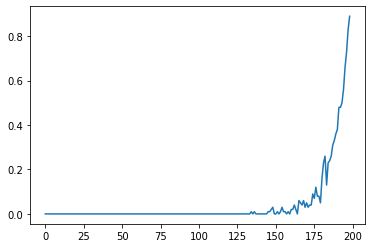

In [40]:
plt.plot(P)